In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_table('water.txt')

In [4]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [5]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


In [6]:
df.location.value_counts()

North    35
South    26
Name: location, dtype: int64

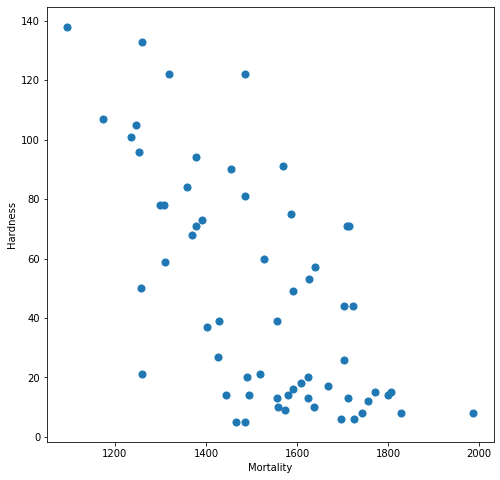

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(df.mortality, df.hardness, cmap='autumn', s=50)
plt.xlabel('Mortality')
plt.ylabel('Hardness');

In [8]:
from statsmodels.stats.weightstats import _tconfint_generic

In [28]:
x_mean = df.mortality.mean()
x_mean_std = df.mortality.std(ddof=1) / (len(df) ** 0.5)
_tconfint_generic(x_mean, x_mean_std, len(df.mortality) - 1, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

In [29]:
south_df = df.loc[df.location == 'South']
x_mean_south = south_df.mortality.mean()
x_mean_south_std = south_df.mortality.std() / (len(south_df) ** 0.5)
_tconfint_generic(x_mean_south, x_mean_south_std, len(south_df.mortality) - 1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

In [11]:
north_df = df.loc[df.location == 'North']
x_mean_north = north_df.mortality.mean()
x_mean_north_std = north_df.mortality.std() / (north_df.size ** 0.5)
_tconfint_generic(x_mean_north, x_mean_north_std, len(north_df.mortality) - 1, 0.05, 'two-sided')

(1610.080262598069, 1657.1197374019307)

In [12]:
sns.set(rc={'figure.figsize':(8, 8)})

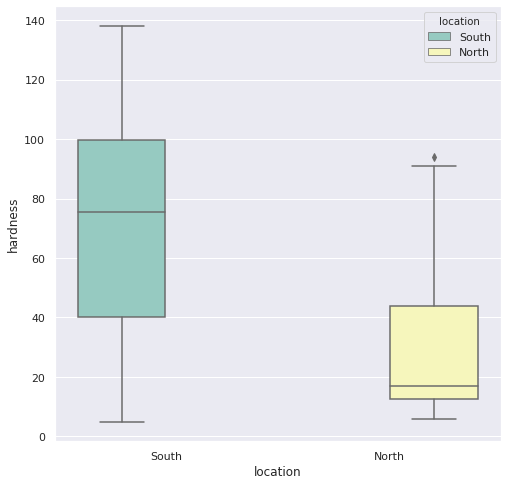

In [13]:
sns.boxplot(x='location', y='hardness', hue='location', data=df, order=['South', 'North'], palette='Set3');

In [14]:
x_mean_south_water = south_df.hardness.mean()
x_mean_south_water_std = south_df.hardness.std() / (south_df.size ** 0.5)
_tconfint_generic(x_mean_south_water, x_mean_south_water_std, len(south_df.hardness) - 1, 0.05, 'two-sided')

(61.61821473063344, 77.92024680782811)

In [15]:
x_mean_north_water = north_df.hardness.mean()
x_mean_north_water_std = north_df.hardness.std() / (north_df.size ** 0.5)
_tconfint_generic(x_mean_north_water, x_mean_north_water_std, len(north_df.hardness) - 1, 0.05, 'two-sided')

(25.91124364286213, 34.88875635713787)

In [24]:
_tconfint_generic(df.mortality.mean(), 
                  df.mortality.std(ddof=1) / np.sqrt(len(df)), 
                  len(df) - 1, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

In [16]:
_tconfint_generic(df[df.location == 'South'].mortality.mean(), 
                  df[df.location == 'South'].mortality.std(ddof=1) / np.sqrt(len(df[df.location == 'South'])), 
                  len(df[df.location == 'South']) - 1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

In [17]:
_tconfint_generic(df[df.location == 'North'].mortality.mean(), 
                  df[df.location == 'North'].mortality.std(ddof=1) / np.sqrt(len(df[df.location == 'North'])), 
                  len(df[df.location == 'North']) - 1, 0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)

In [18]:
_tconfint_generic(df[df.location == 'South'].hardness.mean(), 
                  df[df.location == 'South'].hardness.std(ddof=1) / np.sqrt(len(df[df.location == 'South'])), 
                  len(df[df.location == 'South']) - 1, 0.05, 'two-sided')

(53.467198692036106, 86.07126284642544)

In [19]:
_tconfint_generic(df[df.location == 'North'].hardness.mean(), 
                  df[df.location == 'North'].hardness.std(ddof=1) / np.sqrt(len(df[df.location == 'North'])), 
                  len(df[df.location == 'North']) - 1, 0.05, 'two-sided')

(21.42248728572426, 39.37751271427574)

In [22]:
from scipy import stats

In [23]:
np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)

385.0